## Convolutional Neural Network Assignment: Image Classification on CIFAR 10
In this assignment, you will design and implement a CNN model in Keras. We will use the CIFAR-10. Please note you **only need to use 1000 training examples** (CPU is much slower than GPU so we do not use the full dataset). Please complete the rest of the notebook by doing following tasks.

- Build your network. Your network should have **at least 2 convolutional layers, 1 max pooling layer and 1 fully connected layer**
- Train your network. Use Keras to train your network based on your network structure. Describe your training procedure. Plot the following:
    1. Training and validation loss vs. training iterations.
    2. Training and validation accuracy vs. training iterations.
- Report a final test result on 100 testing examples.
- Give detailed explanation of your code


- *Bonus*: you can use more train/test data to build a stronger model

You may want to check [Keras documentation](http://keras.io) for reference.

In [80]:
# some setup code
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np

# A bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [81]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)

X_train shape: (50000, 3, 32, 32)


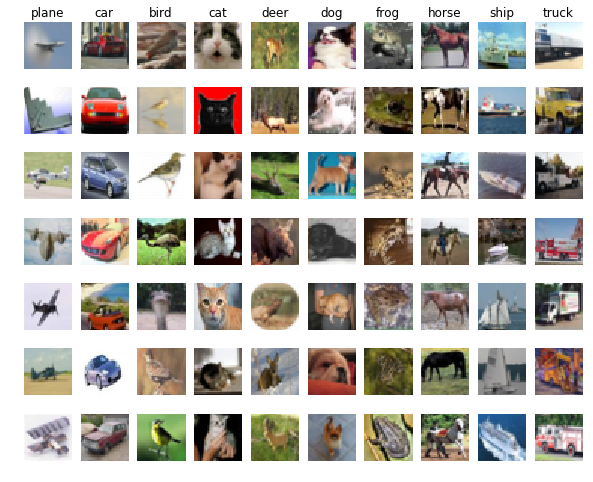

In [82]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].transpose((1,2,0)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [83]:
# Subsample the data for more efficient code execution in this exercise
num_training = 1000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 100
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# because Keras wants something called "one-hot" (https://en.wikipedia.org/wiki/One-hot) to be labels
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

1000 train samples
100 test samples


### Please complete the rest of the notebook: Build and Train A CNN Model
Remember we are training on a very small subset of CIFAR 10, so it is easy to overfit!

In [84]:
# Setting batch size and epoch count
batch_size = 32 
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB, so 3 channels
img_channels = 3

# The model starts here
model = Sequential()

# 2x convolving layers (32 filters, 3x3 windows)
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(3, 32, 32), activation='relu' ))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flattening model for fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Classification layer
model.add(Dense(nb_classes, activation='softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

model.fit(X_train, Y_train, batch_size=batch_size,
          nb_epoch=nb_epoch*5, show_accuracy=True, shuffle=True)

Epoch 1/50
1000/1000 [==============================] - 23s - loss: 2.3636 - acc: 0.1100    
Epoch 2/50
1000/1000 [==============================] - 23s - loss: 2.1644 - acc: 0.2000    
Epoch 3/50
1000/1000 [==============================] - 23s - loss: 1.9930 - acc: 0.2770    
Epoch 4/50
1000/1000 [==============================] - 23s - loss: 1.9320 - acc: 0.3090    
Epoch 5/50
1000/1000 [==============================] - 23s - loss: 1.8405 - acc: 0.3340    
Epoch 6/50
1000/1000 [==============================] - 23s - loss: 1.7175 - acc: 0.4000    
Epoch 7/50
1000/1000 [==============================] - 23s - loss: 1.5315 - acc: 0.4490    
Epoch 8/50
1000/1000 [==============================] - 23s - loss: 1.4644 - acc: 0.4820    
Epoch 9/50
1000/1000 [==============================] - 23s - loss: 1.2749 - acc: 0.5550    
Epoch 10/50
1000/1000 [==============================] - 23s - loss: 1.1846 - acc: 0.5870    
Epoch 11/50
1000/1000 [==============================] - 23s - loss: 

### Test your model on test set

In [85]:
score = model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100, "%")

Test loss: 2.46388936043
Test accuracy: 48.0 %
